In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.options.mode.chained_assignment = None  # default='warn'
data = pd.read_csv('gdansk_larger_data.csv')

In [5]:
data

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,gdaĹsk,2020-11-01,8.7,5.7,7.2,5.9,2.1,3.9,5.7,90.0,...,4.2,3,NaN,2020-11-01T06:47:42,2020-11-01T16:09:24,0.53,"Rain, Overcast",Cloudy skies throughout the day with late afte...,rain,"12142099999,12376599999,D8078,12136099999,EPGD..."
1,gdaĹsk,2020-11-02,14.9,8.8,12.2,14.9,6.0,11.6,11.5,95.7,...,1.1,1,NaN,2020-11-02T06:49:41,2020-11-02T16:07:24,0.56,"Rain, Overcast",Cloudy skies throughout the day with rain in t...,rain,"12142099999,12376599999,D8078,12136099999,1216..."
2,gdaĹsk,2020-11-03,14.7,7.0,11.9,14.7,6.0,11.5,8.9,82.7,...,3.4,2,NaN,2020-11-03T06:51:40,2020-11-03T16:05:25,0.60,"Rain, Partially cloudy",Clearing in the afternoon with rain clearing l...,rain,"12142099999,12376599999,D8078,12136099999,1216..."
3,gdaĹsk,2020-11-04,11.4,7.1,8.8,11.4,4.1,7.2,5.3,79.4,...,3.7,2,NaN,2020-11-04T06:53:40,2020-11-04T16:03:28,0.63,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"12142099999,12376599999,D8078,12136099999,1216..."
4,gdaĹsk,2020-11-05,10.8,6.6,8.8,10.8,3.3,6.6,6.0,83.3,...,3.7,2,NaN,2020-11-05T06:55:39,2020-11-05T16:01:33,0.67,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"12142099999,12376599999,D8078,12136099999,EPGD..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,gdańsk,2023-07-09,23.1,12.4,18.4,23.1,12.4,18.4,13.0,72.6,...,19.4,8,10.0,2023-07-09T04:22:41,2023-07-09T21:17:56,0.71,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"12142099999,12376599999,12136099999,1216009999..."
982,gdańsk,2023-07-10,21.2,14.1,18.5,21.2,14.1,18.5,14.1,76.3,...,18.1,7,10.0,2023-07-10T04:23:50,2023-07-10T21:17:03,0.75,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"12142099999,12376599999,12136099999,1216009999..."
983,gdańsk,2023-07-11,22.3,15.3,18.5,22.3,15.3,18.5,15.3,82.3,...,13.0,6,10.0,2023-07-11T04:25:00,2023-07-11T21:16:07,0.78,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"12142099999,12376599999,D8078,12136099999,EPGD..."
984,gdańsk,2023-07-12,26.0,13.0,19.4,26.0,13.0,19.4,14.5,76.2,...,11.4,6,30.0,2023-07-12T04:26:13,2023-07-12T21:15:08,0.81,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"EPGD,AV308"


## Cleaning the data

In [6]:
data['datetime'] = pd.to_datetime(data['datetime'])    

## Visualizing the temperature

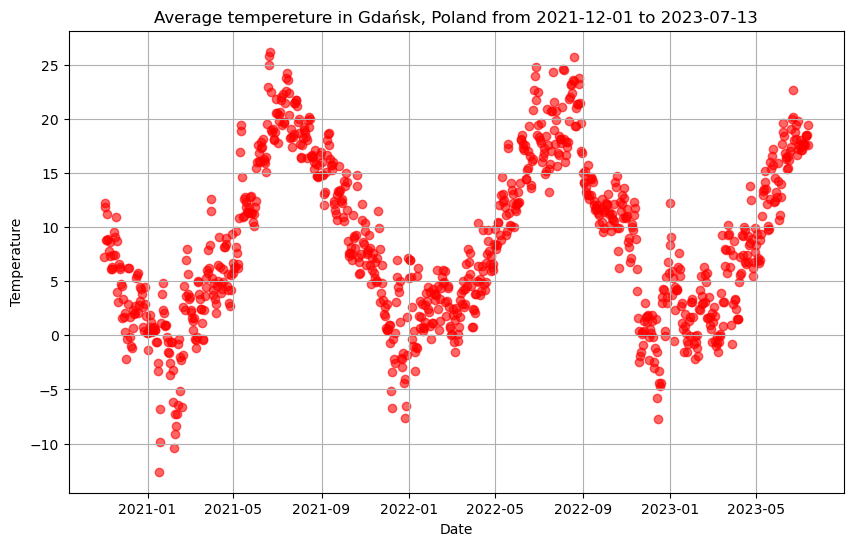

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(x=data['datetime'], y=data['temp'], color='red', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Average tempereture in Gdańsk, Poland from 2021-12-01 to 2023-07-13')
plt.grid()
plt.show()

In [8]:
min_feel = data['feelslikemin'].min()
max_feel = data['feelslikemax'].max()
indexofminfeelslike = np.where(data['feelslikemin'] == min_feel)
indexofmaxfeelslike = np.where(data['feelslikemax'] == max_feel)
min_feel_data = data['datetime'][indexofminfeelslike[0][0]]
max_feel_data = data['datetime'][indexofmaxfeelslike[0][0]]

## Visualizing the feels like temperature and the temperature

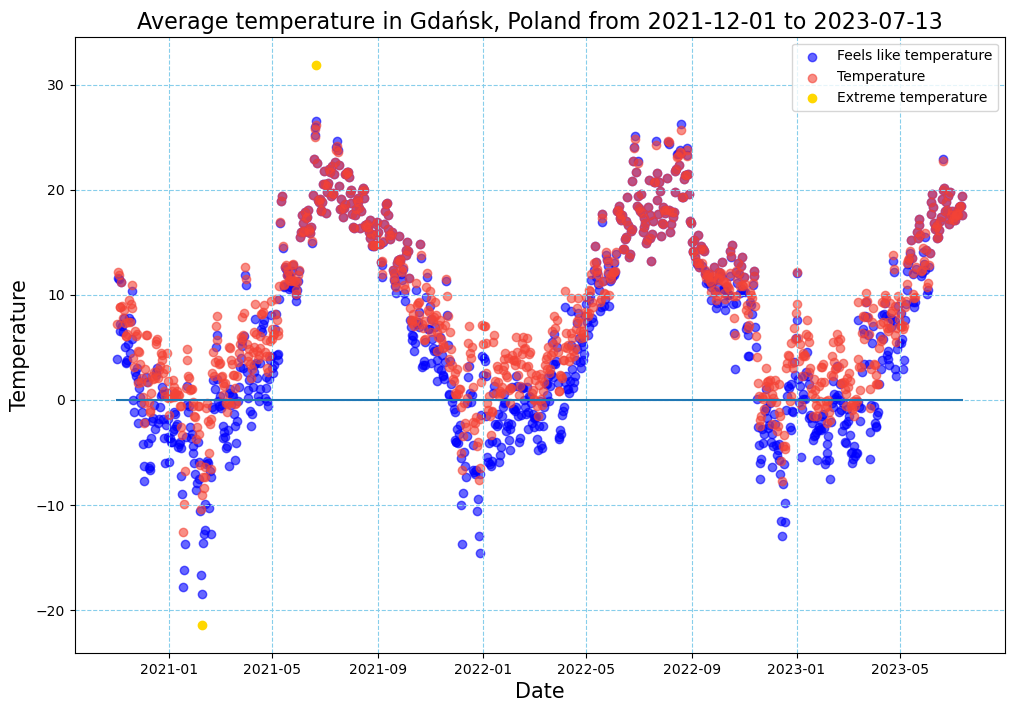

The lowest noted temperature -14.3 / The lowest feels like noted temperature -21.4
The highest noted temperature 31.7 / the highest feels like noted temperature 31.9


In [9]:
extreme_temp = [max_feel, min_feel]
extreme_temp_date = [max_feel_data, min_feel_data]

plt.figure(figsize=(12, 8))
plt.scatter(x=data['datetime'], y=data['feelslike'], color='blue', alpha=0.6, label='Feels like temperature')
plt.scatter(x=data['datetime'], y=data['temp'], color='#F44336', alpha=0.6, label='Temperature')
plt.scatter(x=extreme_temp_date, y=extreme_temp, color='gold', label='Extreme temperature')
sns.lineplot(x=data['datetime'], y=0)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Temperature', fontsize=15)
plt.title('Average temperature in Gdańsk, Poland from 2021-12-01 to 2023-07-13', fontsize=16)
plt.grid(True, linestyle='--', color='skyblue')  # Add gridlines with a dashed line style
plt.legend()

plt.show()

print(f"The lowest noted temperature {data['tempmin'].min()} / The lowest feels like noted temperature {data['feelslikemin'].min()}")
print(f"The highest noted temperature {data['tempmax'].max()} / the highest feels like noted temperature {data['feelslikemax'].max()}")

## Visualzing the chunk of data on a scatter plot 

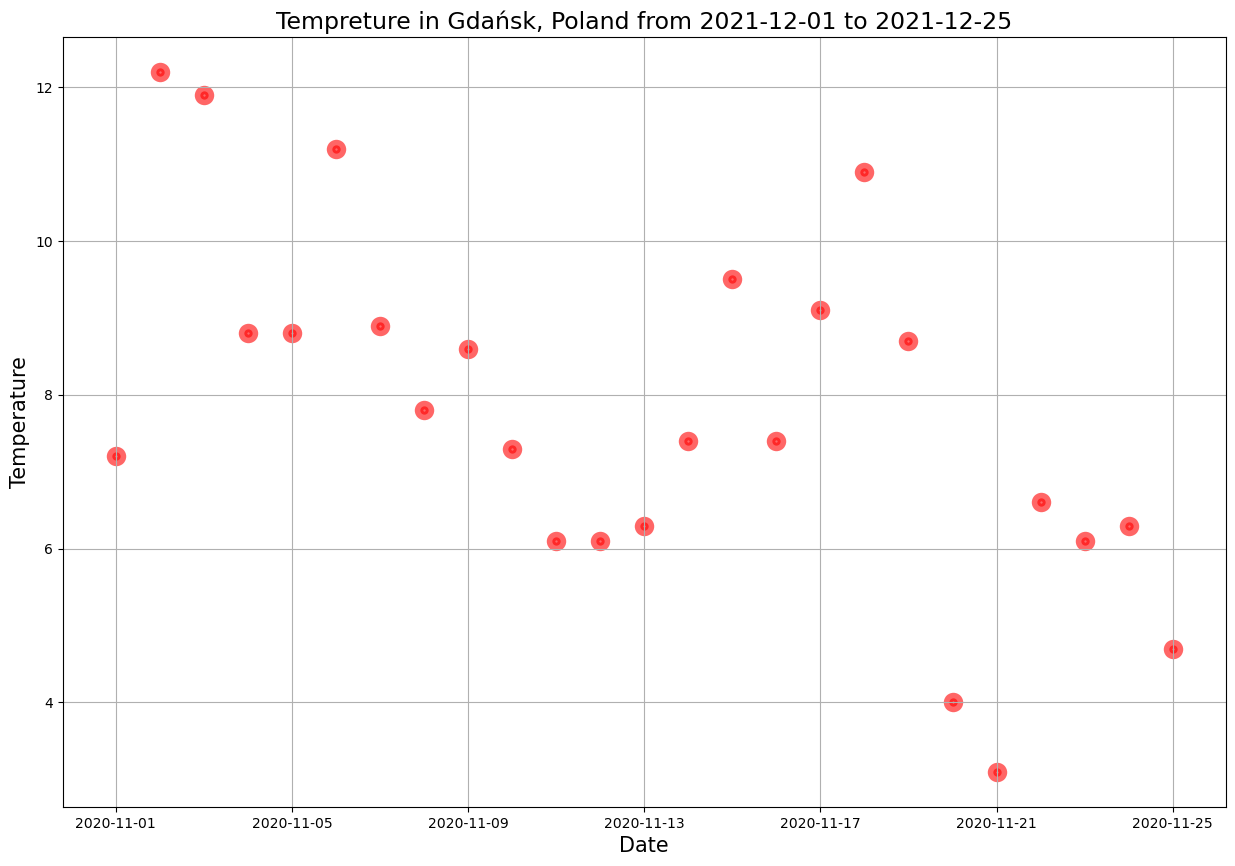

In [10]:
plt.figure(figsize=(15, 10))
plt.scatter(x=data['datetime'][:25], y=data['temp'][:25], color='red', alpha=0.6, linewidths=8)
plt.grid()
plt.xlabel('Date', fontsize=15)
plt.ylabel('Temperature', fontsize=15)
plt.title('Tempreture in Gdańsk, Poland from 2021-12-01 to 2021-12-25', fontsize=17)
plt.show()

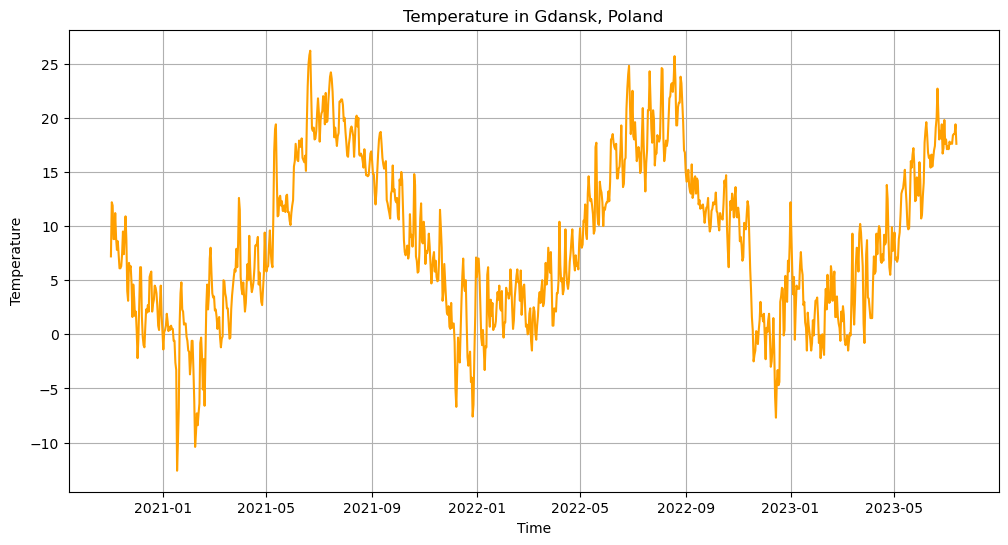

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=data['datetime'], y=data['temp'], color='#FFA000')
plt.title('Temperature in Gdansk, Poland')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.grid()
plt.show()

## Visualizing rainy days on scatter plot

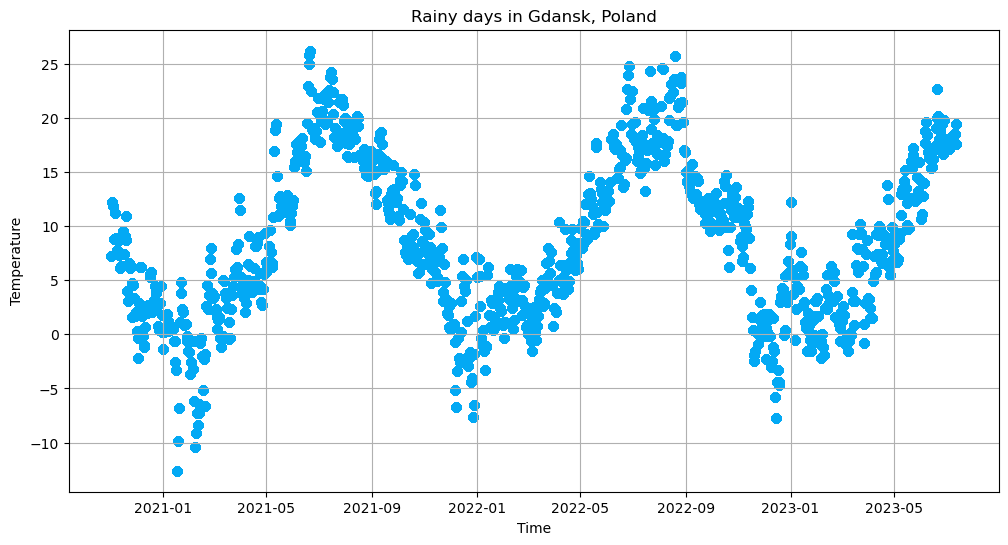

Percentage of rainy days in Gdansk: 57.61%


In [12]:
rain_counter = 0
plt.figure(figsize=(12, 6))
for i in range(len(data)):
    if(data['icon'][i] == 'rain'):
        rain_counter += 1
        plt.scatter(x=data['datetime'], y=data['temp'], color='#03A9F4')
plt.title('Rainy days in Gdansk, Poland')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.grid()
plt.show()
print(f'Percentage of rainy days in Gdansk: {round((rain_counter / len(data) * 100), 2)}%')